In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal 

Text(0, 0.5, 'amplitude')

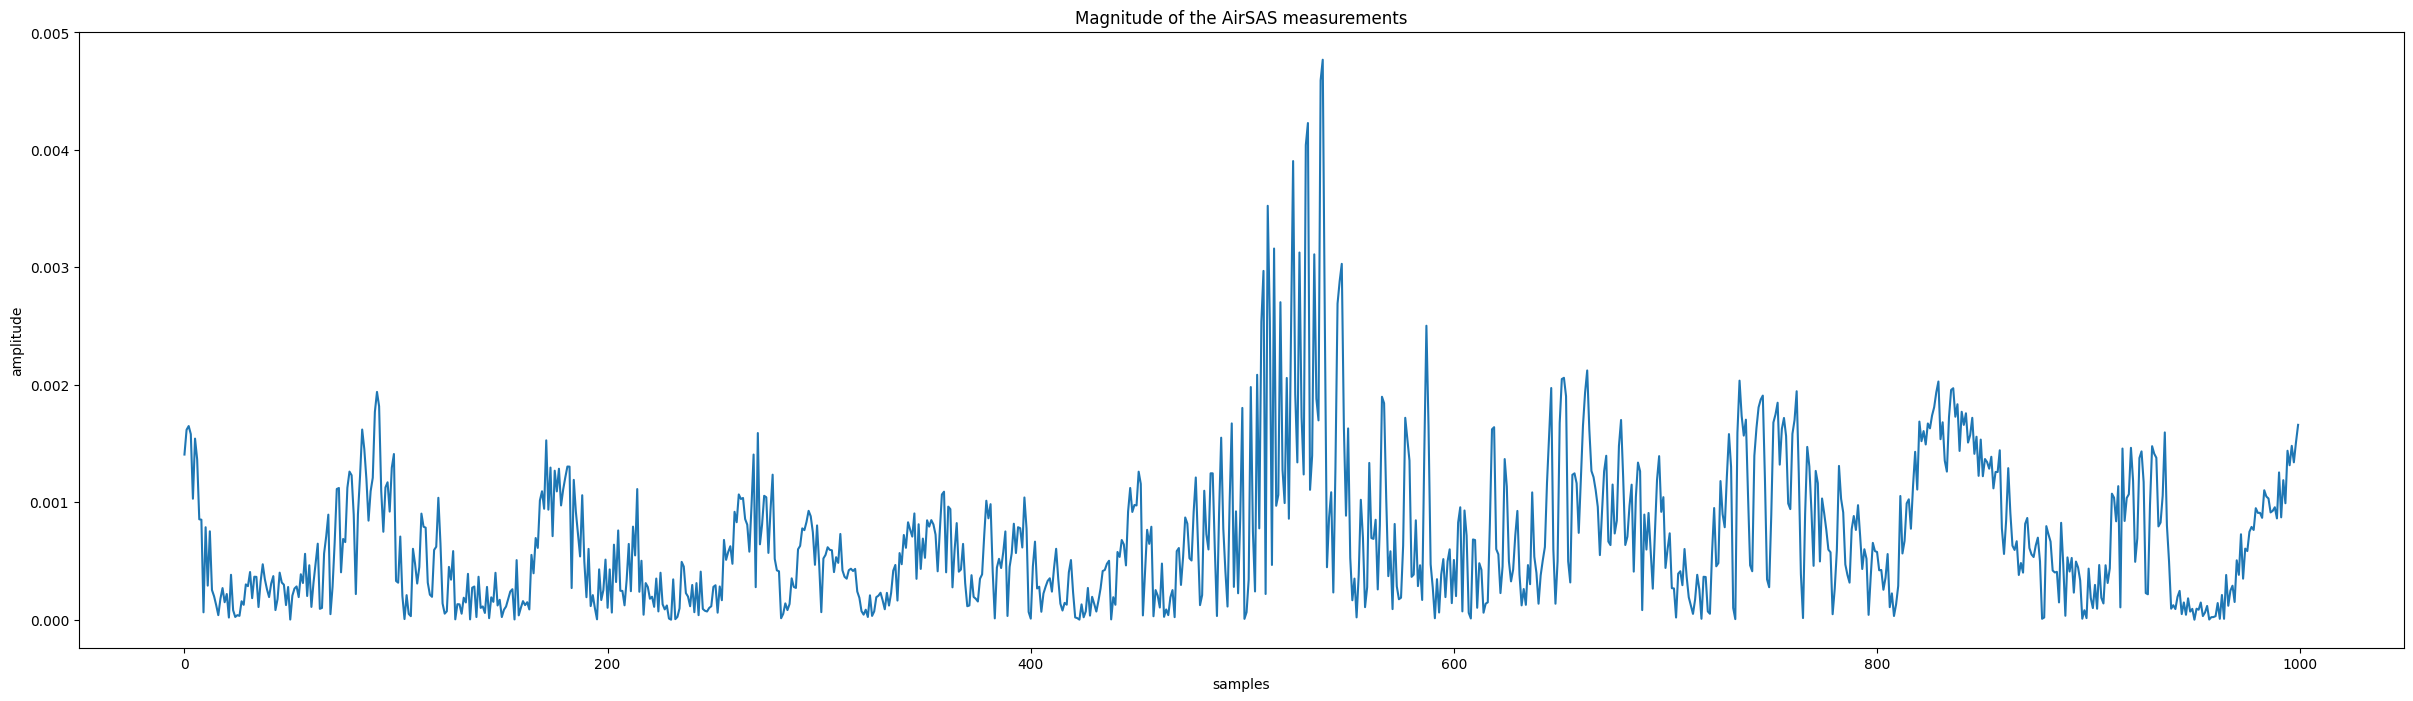

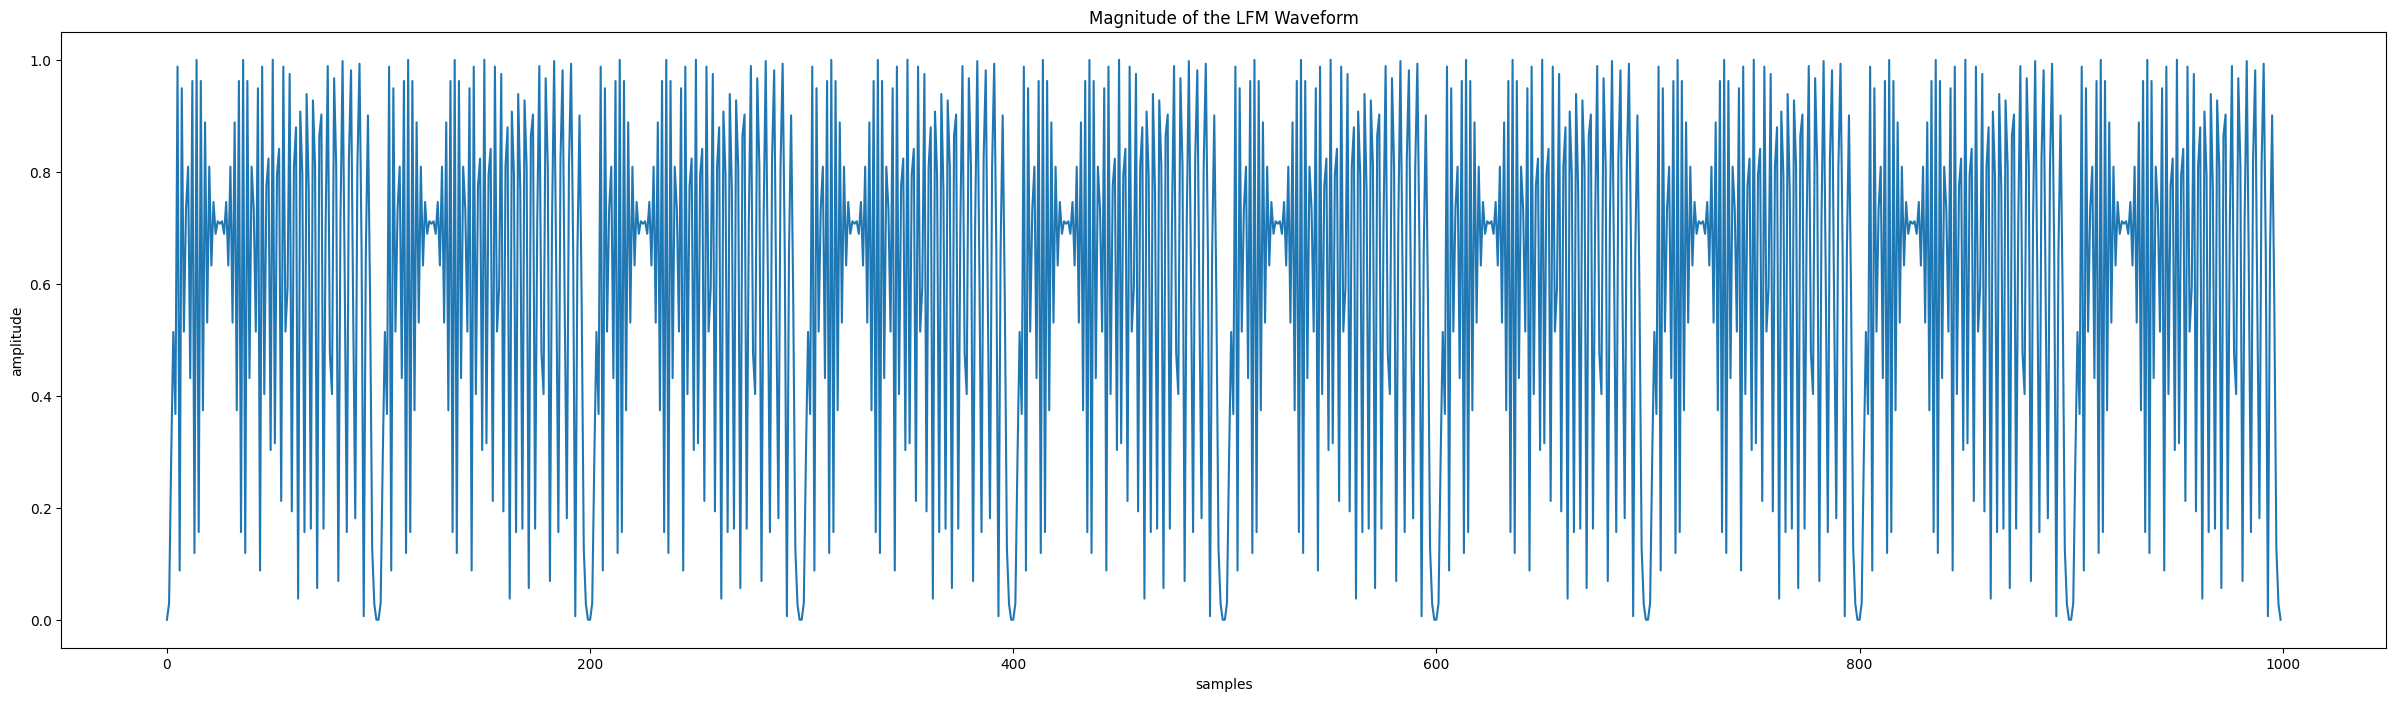

In [2]:
#match filter
measurements = np.load('measurements.npy') #loading the measurements
lmf_wfm = np.load('transmit_wfm.npy')

#plotting the first measurement
plt.figure(figsize=(30,8)) # create a new figure
plt.plot(np.abs(measurements[0]))
plt.title('Magnitude of the AirSAS measurements')
plt.xlabel('samples')
plt.ylabel('amplitude')

#expanding the waveform to 1000 samples
lmf_ext = np.tile(lmf_wfm,10)

plt.figure(figsize=(30,8)) # create a new figure
plt.plot(np.abs(lmf_ext))
plt.title('Magnitude of the LFM Waveform')
plt.xlabel('samples')
plt.ylabel('amplitude')


In [3]:
mfilter = np.zeros((360,901))
analytic_signal = np.zeros((360,901))

for i in range(0,360):
    #calculating the match filter
    mfilter[i] = signal.correlate(measurements[i],lmf_wfm,mode='valid') 
    #calculating the analytic signal
    analytic_signal[i] = signal.hilbert(mfilter[i])
    

C:\Users\Blaze\AppData\Local\Temp\ipykernel_2076\158752413.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  analytic_signal[i] = signal.hilbert(mfilter[i])


Text(0, 0.5, 'phase')

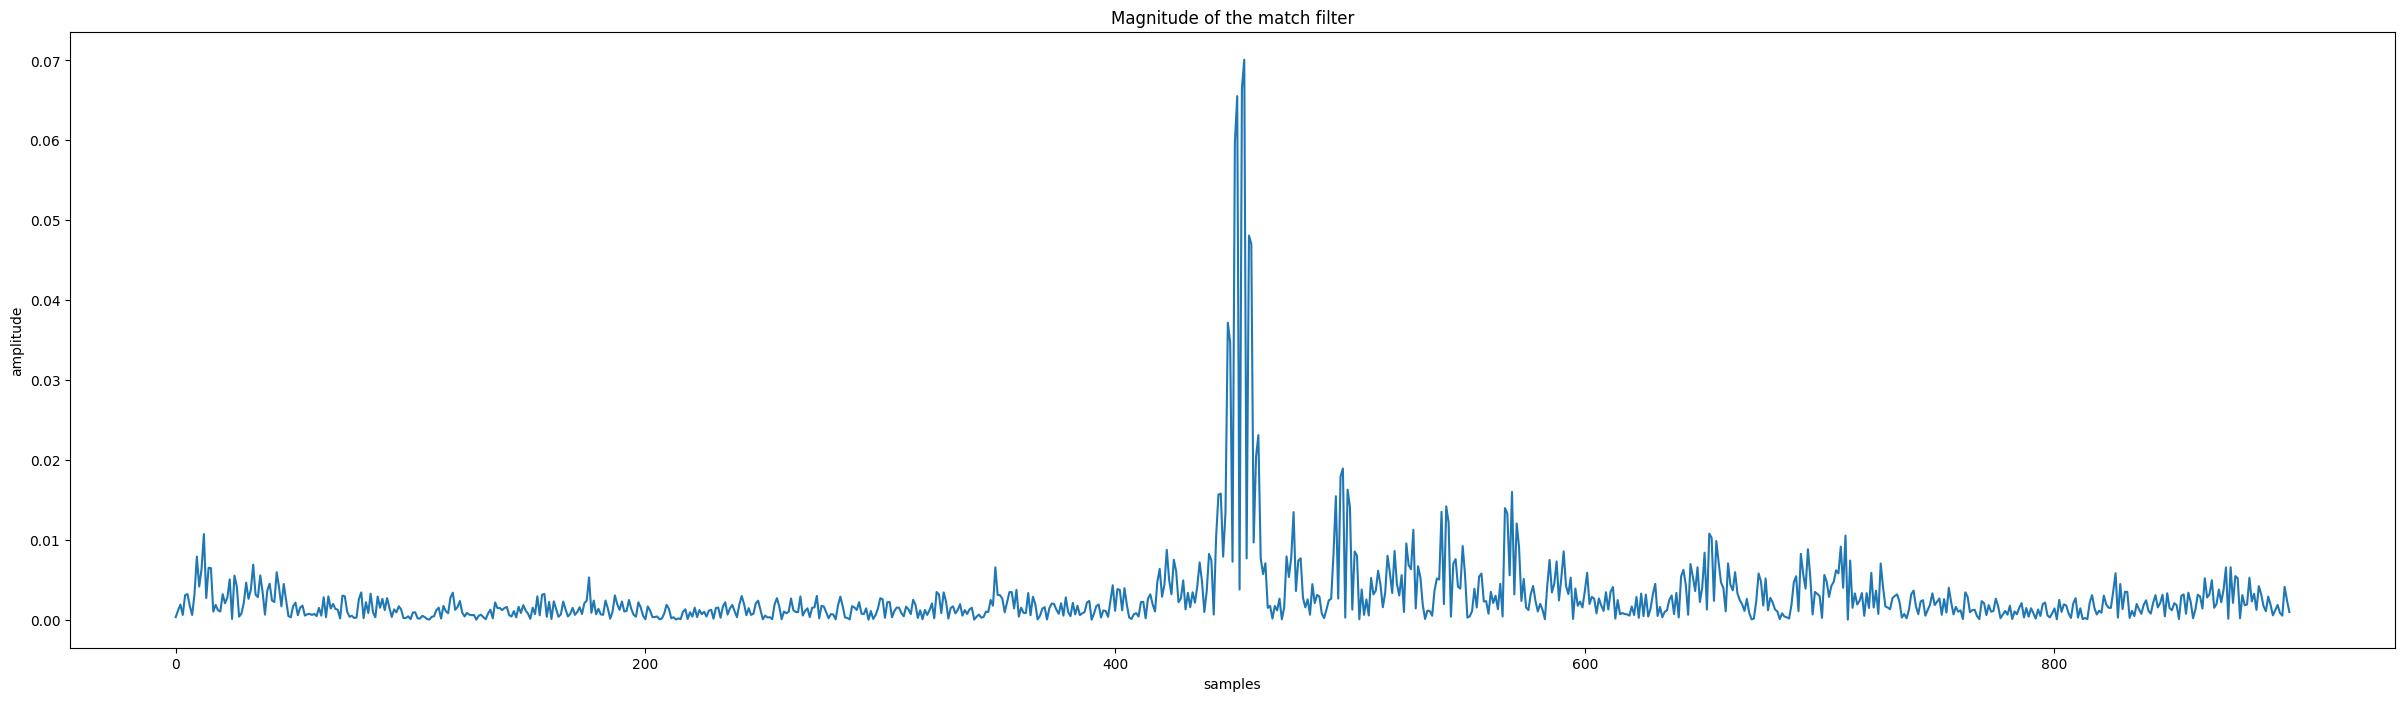

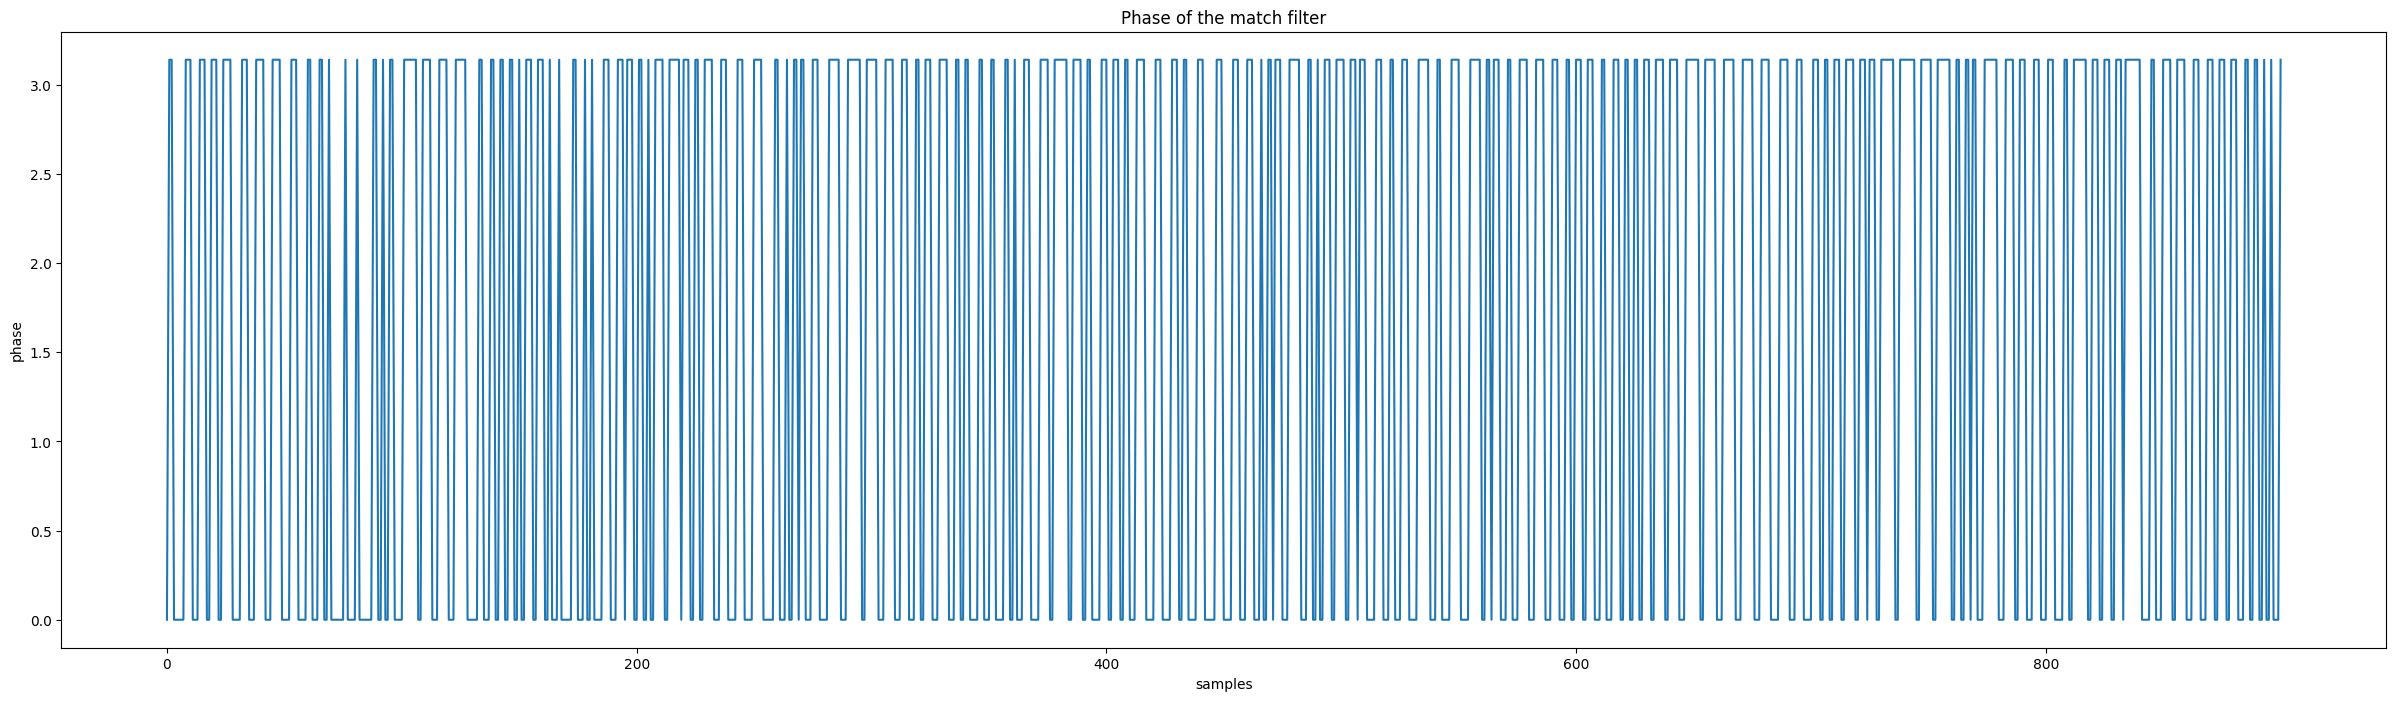

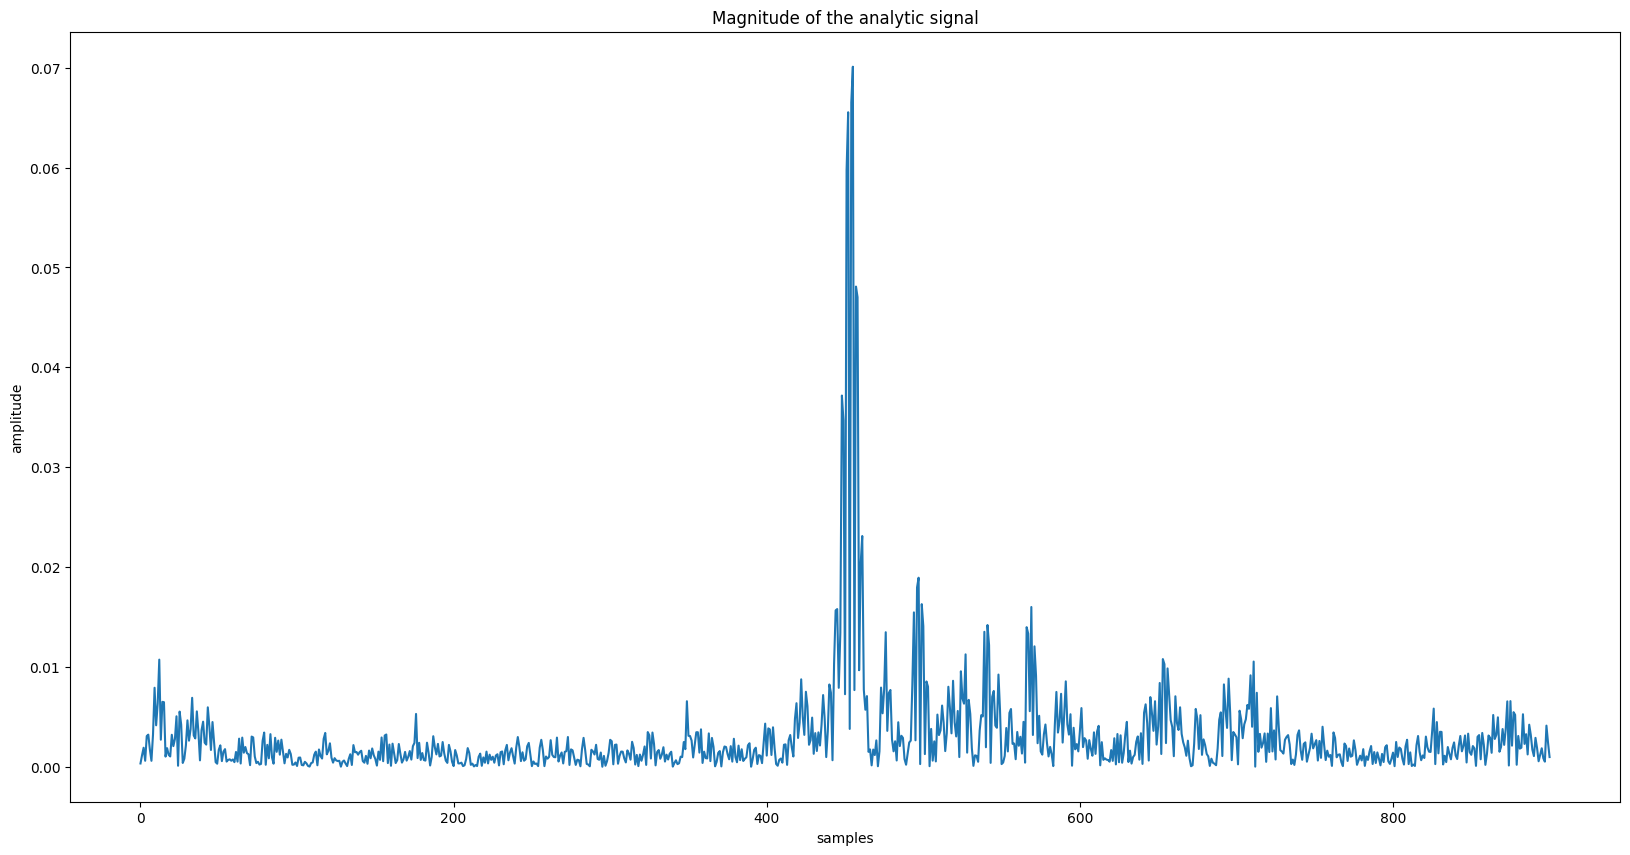

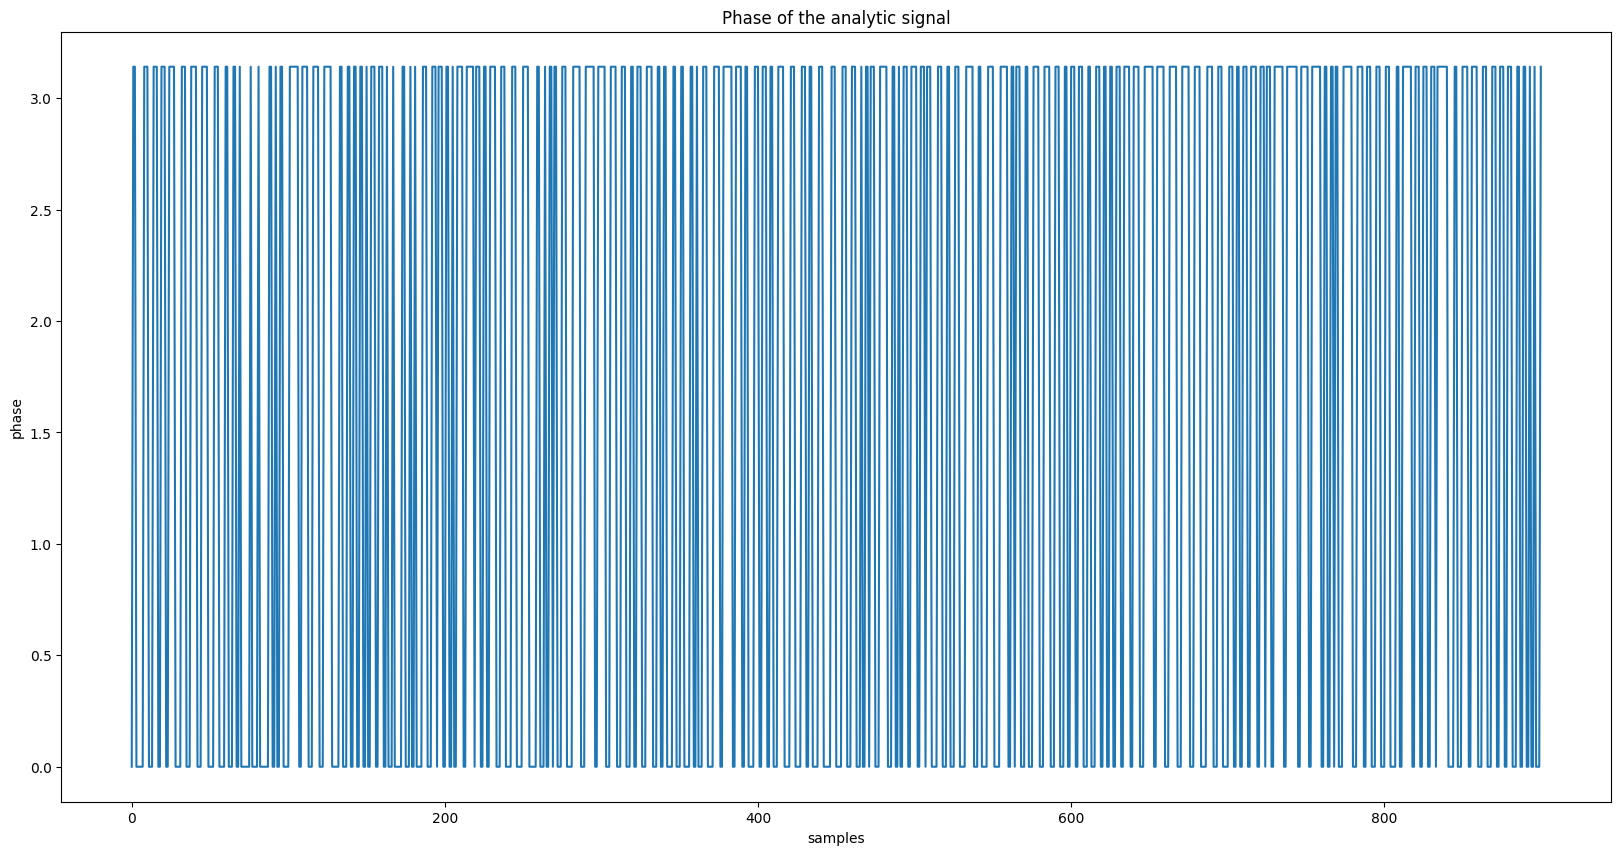

In [4]:
#plotting the match filter for 1st sample

mfil_mag = np.abs(mfilter[0]) #magnitude the match filter
mfil_phase = np.angle(mfilter[0]) #phase the match filter

plt.figure(figsize=(30,8)) # create a new figure
plt.plot(mfil_mag)

plt.title('Magnitude of the match filter')
plt.xlabel('samples')
plt.ylabel('amplitude')

plt.figure(figsize=(30,8)) # create a new figure
plt.plot(mfil_phase)
plt.title('Phase of the match filter')
plt.xlabel('samples')
plt.ylabel('phase')

#plotting the analytic signal for the first sample

analy_mag = np.abs(analytic_signal[0])
analy_phase = np.angle(analytic_signal[0])

plt.figure(figsize=(20,10)) # create a new figure
plt.plot(analy_mag)
plt.title('Magnitude of the analytic signal')
plt.xlabel('samples')
plt.ylabel('amplitude')


plt.figure(figsize=(20,10)) # create a new figure
plt.plot(analy_phase)
plt.title('Phase of the analytic signal')
plt.xlabel('samples')
plt.ylabel('phase')

In [5]:
pixels = np.load('pixels.npy')
tx_coords = np.load('tx_coords.npy')
rx_coords = np.load('rx_coords.npy')

index = np.zeros((22500))
c = 344.351
sample_rate = 100000 #100kHz 
complex_image = np.zeros((22500),dtype = 'complex')

for i in range(0,22500): #for pixel index
    tof = 0
    for j in range(0,360):  #for receiver and trasmitter index
        d1 = np.sqrt((np.power(tx_coords[j,0]-pixels[i,0],2))+(np.power(tx_coords[j,1]-pixels[i,1],2))+(np.power(tx_coords[j,2]-pixels[i,2],2)))
        d2 = np.sqrt((np.power(rx_coords[j,0]-pixels[i,0],2))+(np.power(rx_coords[j,1]-pixels[i,1],2))+(np.power(rx_coords[j,2]-pixels[i,2],2)))
        dtot = d1+d2
        tof = dtot/c
        index = sample_rate*tof
        complex_image[i] = complex_image[i]+analytic_signal[j,int(index)]


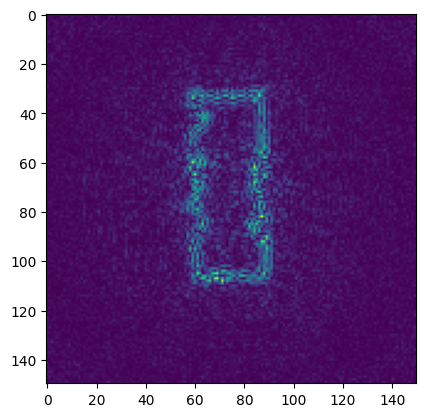

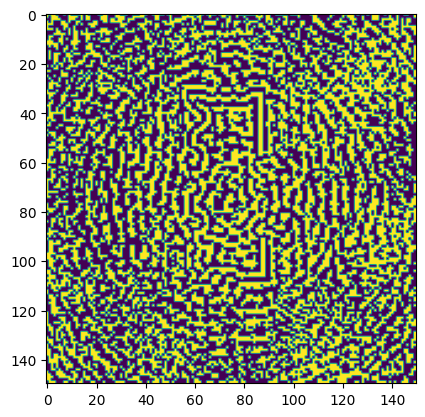

In [6]:
img = complex_image.reshape((150,150))
#magnitude of the image
plt.figure()
plt.imshow(np.abs(img))

#phase of the image
plt.figure()
plt.imshow(np.angle(img))